In [1]:
from datetime import datetime
from dateutil import tz
from pynwb import NWBFile
from pynwb import NWBHDF5IO
import pandas as pd
import sys
sys.path.append("..")

from jdb_to_nwb.convert_photometry import add_photometry

def test_convert_photometry():
    """ Test the add_photometry function. """

    # Test data is copied from T:\ACh Rats\80B8CE6 (Ceecee)\02222024-L
    metadata = {}
    metadata["photometry"] = {}
    metadata["photometry"]["signals_mat_file_path"] = '/Volumes/Jose/ACh Rats/80B8CE6_ceecee/02222024-L/signals.mat'

    nwbfile = NWBFile(
        session_description="Mock session",
        session_start_time=datetime.now(tz.tzlocal()),
        identifier="mock_session",
    )

    gzdFF, rzdFF, z_ref = add_photometry(nwbfile, metadata)
    return gzdFF, rzdFF, z_ref

In [3]:
gzdFF, z_ref = test_convert_photometry()

reference_data_path = '/Volumes/Jose/ACh Rats/80B8CE6_ceecee/02222024-L/80B8CE6 (Ceecee)_02222024-L_h_sampleframe.csv'
ref_df = pd.read_csv(reference_data_path)
# 
# # Save the NWBFile as a test
# with NWBHDF5IO("photometry_test.nwb", "w") as io:
#     io.write(nwbfile)

Adding photometry...


ValueError: not enough values to unpack (expected 3, got 2)

,Unnamed: 0,x,y,green,port,rwd,block,pA,pB,pC,...,nextp,lenAC,lenBC,lenAB,simple_rr,pchosen,dtop,nom_rwd_a,nom_rwd_b,nom_rwd_c
0,0,NaN,NaN,1.7320,NaN,NaN,1.0,50.0,10.0,90.0,...,NaN,21.0,15.0,25.0,0.0,90.0,21.0,50.0,10.0,90.0
1,1,NaN,NaN,1.8400,NaN,NaN,1.0,50.0,10.0,90.0,...,NaN,21.0,15.0,25.0,0.0,90.0,21.0,50.0,10.0,90.0
2,2,NaN,NaN,1.9690,NaN,NaN,1.0,50.0,10.0,90.0,...,NaN,21.0,15.0,25.0,0.0,90.0,21.0,50.0,10.0,90.0
3,3,NaN,NaN,2.1110,NaN,NaN,1.0,50.0,10.0,90.0,...,NaN,21.0,15.0,25.0,0.0,90.0,21.0,50.0,10.0,90.0
4,4,NaN,NaN,2.2620,NaN,NaN,1.0,50.0,10.0,90.0,...,NaN,21.0,15.0,25.0,0.0,90.0,21.0,50.0,10.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923562,923562,NaN,NaN,-0.7240,NaN,NaN,1.0,50.0,10.0,90.0,...,2.0,NaN,NaN,NaN,1.0,NaN,NaN,50.0,10.0,90.0
923563,923563,NaN,NaN,-0.6740,NaN,NaN,1.0,50.0,10.0,90.0,...,2.0,NaN,NaN,NaN,1.0,NaN,NaN,50.0,10.0,90.0
923564,923564,NaN,NaN,-0.5810,NaN,NaN,1.0,50.0,10.0,90.0,...,2.0,NaN,NaN,NaN,1.0,NaN,NaN,50.0,10.0,90.0
923565,923565,NaN,NaN,-0.4517,NaN,NaN,1.0,50.0,10.0,90.0,...,2.0,NaN,NaN,NaN,1.0,NaN,NaN,50.0,10.0,90.0


Index(['Unnamed: 0', 'x', 'y', 'green', 'port', 'rwd', 'block', 'pA', 'pB',
       'pC', 'frame', 'ref', 'vel', 'acc', 'tri', 'fromP', '470', 'beamA',
       'beamB', 'beamC', 'tot_tri', 'green_z_scored', 'fiberloc',
       'session_type', 'rat', 'date', 'nextprob', 'nextp', 'lenAC', 'lenBC',
       'lenAB', 'simple_rr', 'pchosen', 'dtop', 'nom_rwd_a', 'nom_rwd_b',
       'nom_rwd_c'],
      dtype='object')


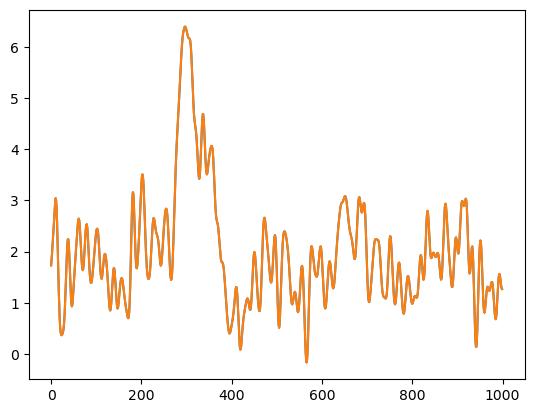

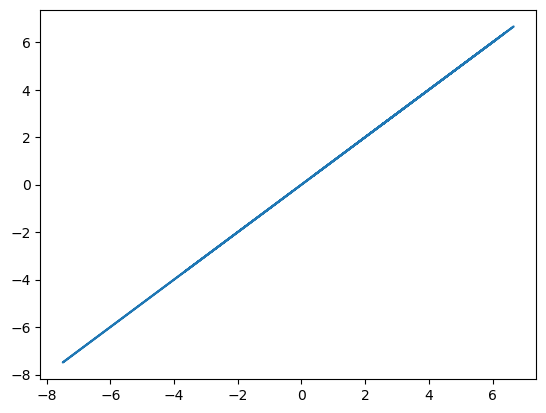

In [3]:
import matplotlib.pyplot as plt

display(ref_df)
print(ref_df.columns)

plt.figure()
plt.plot(gzdFF[0:1000])
plt.plot(ref_df['green'][0:1000])
plt.show()

plt.figure()
plt.plot(gzdFF, ref_df['green'])
plt.show()

# plt.figure()
# plt.plot(gzdFF - ref_df['green'])
# plt.show()

In [ ]:
from pynwb import NWBHDF5IO

# Open the NWB file
nwb_file_path = 'photometry_test.nwb'  # Replace with your file path
io = NWBHDF5IO(nwb_file_path, 'r')  # 'r' indicates read mode
nwbfile = io.read()

# Read the photometry data to check it exists! 
# (It doesn't yet because our add_photometry function doesn't add things to the NWB yet)

# Close the file after reading
io.close()
